# Kelompok 6:
## 1. Yoan Natasya Agustin (103102430001)
## 2. ⁠Ni Luh Made Sri Utami Pradnyandari (103102400055)
## 3. ⁠Dhana Zeta Pangestu (103102400064)
## 4. Muhammad Nabil Fahruddin Evan (103102400053)
## 5. ⁠Akhmad Bustomi (103102400021)

In [406]:
import sqlite3 as SQL
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [407]:
conn = SQL.connect('CoffeeShop_Dataset.db')
cur = conn.cursor()

In [408]:
tables = pd.read_sql_query("SELECT * FROM sqlite_master WHERE type='table';", conn)
tables

,type,name,tbl_name,rootpage,sql
0,table,sales outlet,sales outlet,2,"CREATE TABLE ""sales outlet"" (\n""sales_outlet_i..."
1,table,pastry inventory,pastry inventory,3,"CREATE TABLE ""pastry inventory"" (\n""sales_outl..."
2,table,product,product,7,"CREATE TABLE ""product"" (\n""product_id"" INTEGER..."
3,table,generations,generations,11,"CREATE TABLE ""generations"" (\n""birth_year"" INT..."
4,table,sales reciepts,sales reciepts,12,"CREATE TABLE ""sales reciepts"" (\n""transaction_..."
5,table,customer,customer,730,"CREATE TABLE ""customer"" (\n""customer_id"" INTEG..."


In [409]:
Sales_Outlet = pd.read_sql_query('SELECT * FROM "sales outlet"', conn)
Sales_Outlet


,sales_outlet_id,sales_outlet_type,store_square_feet,store_address,store_city,store_state_province,store_telephone,store_postal_code,store_longitude,store_latitude,manager,Neighorhood
0,2,warehouse,3400,164-14 Jamaica Ave,Jamaica,NY,972-871-0402,11432,-73.795168,40.705226,NaN,Jamaica
1,3,retail,1300,32-20 Broadway,Long Island City,NY,777-718-3190,11106,-73.924008,40.761196,6.0,Astoria
2,4,retail,1300,604 Union Street,Brooklyn,NY,619-347-5193,11215,-73.983984,40.677645,11.0,Gowanus
3,5,retail,900,100 Church Street,New York,NY,343-212-5151,10007,-74.010130,40.713290,16.0,Lower Manhattan
4,6,retail,1000,122 E Broadway,New York,NY,613-555-4989,10002,-73.992687,40.713852,21.0,Lower East Side
5,7,retail,1200,224 E 57th Street,New York,NY,287-817-2330,10021,-73.960000,40.770000,26.0,Upper East Side
6,8,retail,1500,687 9th Avenue,New York,NY,652-212-7020,10036,-73.990338,40.761887,31.0,Hell's Kitchen
7,9,retail,1700,175 8th Avenue,New York,NY,242-212-0080,10011,-74.000502,40.742760,36.0,Chelsea
8,10,retail,1600,183 W 10th Street,New York,NY,674-646-6434,10014,-74.002722,40.734367,41.0,Greenwich Village


In [410]:
Pastry_Inventory = pd.read_sql_query('SELECT * FROM "pastry inventory"', conn)
Pastry_Inventory

,sales_outlet_id,transaction_date,product_id,start_of_day,quantity_sold,waste,% waste
0,3,4/1/2019,69,18,8,10,56%
1,3,4/1/2019,70,18,12,6,33%
2,3,4/1/2019,71,18,8,10,56%
3,3,4/1/2019,72,48,9,39,81%
4,3,4/1/2019,73,18,9,9,50%
...,...,...,...,...,...,...,...
302,8,4/27/2019,69,18,1,17,94%
303,8,4/27/2019,70,18,4,14,78%
304,8,4/27/2019,71,18,2,16,89%
305,8,4/27/2019,72,48,19,29,60%


In [411]:
Product = pd.read_sql_query('SELECT * FROM "product"', conn)
Product

,product_id,product_group,product_category,product_type,product,product_description,unit_of_measure,current_wholesale_price,current_retail_price,tax_exempt_yn,promo_yn,new_product_yn
0,1,Whole Bean/Teas,Coffee beans,Organic Beans,Brazilian - Organic,It's like Carnival in a cup. Clean and smooth.,12 oz,14.40,$18.00,Y,N,N
1,2,Whole Bean/Teas,Coffee beans,House blend Beans,Our Old Time Diner Blend,Out packed blend of beans that is reminiscent ...,12 oz,14.40,$18.00,Y,N,N
2,3,Whole Bean/Teas,Coffee beans,Espresso Beans,Espresso Roast,Our house blend for a good espresso shot.,1 lb,11.80,$14.75,Y,N,N
3,4,Whole Bean/Teas,Coffee beans,Espresso Beans,Primo Espresso Roast,Our primium single source of hand roasted beans.,1 lb,16.36,$20.45,Y,N,N
4,5,Whole Bean/Teas,Coffee beans,Gourmet Beans,Columbian Medium Roast,A smooth cup of coffee any time of day.,1 lb,12.00,$15.00,Y,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...
83,84,Add-ons,Flavours,Regular syrup,Chocolate syrup,Bursting with chocolate flavour,pump,0.04,$0.80,Y,N,N
84,85,Beverages,Coffee,Specialty coffee,Rio Nights,2 shots of Ouro Brasilerio and pure cane sugar...,6 oz,1.20,$6.00,Y,N,Y
85,87,Beverages,Coffee,Barista Espresso,Ouro Brasileiro shot,From Rio,1.5 oz,0.60,$3.00,Y,N,N
86,88,Beverages,Coffee,Barista Espresso,Ouro Brasileiro shot promo,Ouro promo,16 oz,0.42,$2.10,Y,Y,N


In [412]:
Generation = pd.read_sql_query('SELECT * FROM "generations"', conn)
Generation

,birth_year,generation
0,1946,Baby Boomers
1,1947,Baby Boomers
2,1948,Baby Boomers
3,1949,Baby Boomers
4,1950,Baby Boomers
...,...,...
65,2011,Gen Z
66,2012,Gen Z
67,2013,Gen Z
68,2014,Gen Z


In [413]:
Sales_Reciept = pd.read_sql_query('SELECT * FROM "sales reciepts"', conn)
Sales_Reciept


,transaction_id,transaction_date,transaction_time,sales_outlet_id,staff_id,customer_id,instore_yn,order,line_item_id,product_id,quantity,line_item_amount,unit_price,promo_item_yn
0,7,2019-04-01,12:04:43,3,12,558,N,1,1,52,1,2.50,2.50,N
1,11,2019-04-01,15:54:39,3,17,781,N,1,1,27,2,7.00,3.50,N
2,19,2019-04-01,14:34:59,3,17,788,Y,1,1,46,2,5.00,2.50,N
3,32,2019-04-01,16:06:04,3,12,683,N,1,1,23,2,5.00,2.50,N
4,33,2019-04-01,19:18:37,3,17,99,Y,1,1,34,1,2.45,2.45,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49889,753,2019-04-29,16:51:58,8,42,0,N,1,1,30,1,3.00,3.00,N
49890,756,2019-04-29,16:51:14,8,42,8412,Y,1,1,25,2,4.40,2.20,N
49891,759,2019-04-29,11:17:36,8,15,0,Y,1,1,31,1,2.20,2.20,N
49892,763,2019-04-29,15:45:52,8,45,8030,N,1,1,44,2,5.00,2.50,N


In [414]:
Customer = pd.read_sql_query(" SELECT * FROM customer", conn)
Customer

,customer_id,home_store,customer_first-name,customer_email,customer_since,loyalty_card_number,birthdate,gender,birth_year
0,1,3,Kelly Key,Venus@adipiscing.edu,2017-01-04,908-424-2890,1950-05-29,M,1950
1,2,3,Clark Schroeder,Nora@fames.gov,2017-01-07,032-732-6308,1950-07-30,M,1950
2,3,3,Elvis Cardenas,Brianna@tellus.edu,2017-01-10,459-375-9187,1950-09-30,M,1950
3,4,3,Rafael Estes,Ina@non.gov,2017-01-13,576-640-9226,1950-12-01,M,1950
4,5,3,Colin Lynn,Dale@Integer.com,2017-01-15,344-674-6569,1951-02-01,M,1951
...,...,...,...,...,...,...,...,...,...
2241,8497,8,Rae,Kylie@facilisi.org,2017-01-06,081-440-6679,1977-12-10,F,1977
2242,8498,8,April,Daniel@placerat.us,2019-01-20,705-545-5246,2000-12-07,N,2000
2243,8499,8,Clementine,Dieter@ac.us,2017-11-09,297-550-7776,1996-06-04,F,1996
2244,8500,8,Linda,Dillon@pretium.gov,2017-08-21,255-202-7435,1990-03-01,N,1990


In [415]:
price_factor_query = """
SELECT unit_price, COUNT(*) AS transaction_count, SUM(line_item_amount) AS total_sales FROM "sales reciepts" GROUP BY unit_price ORDER BY total_sales DESC;"""# Menghitung jumlah transaksi berdasarkan harga produk

price_factor_data = pd.read_sql_query(price_factor_query, conn)# Mengambil data dan menampilkan hasilnya

price_factor_data.head()# Menampilkan hasil


,unit_price,transaction_count,total_sales
0,3.00,11316,51036.0
1,2.50,8762,33530.5
2,3.75,6214,30538.5
3,3.50,4609,21357.0
4,4.25,1903,12384.5


## 1. Kapan waktu puncak transaksi penjualan kopi (hari, bulan)?

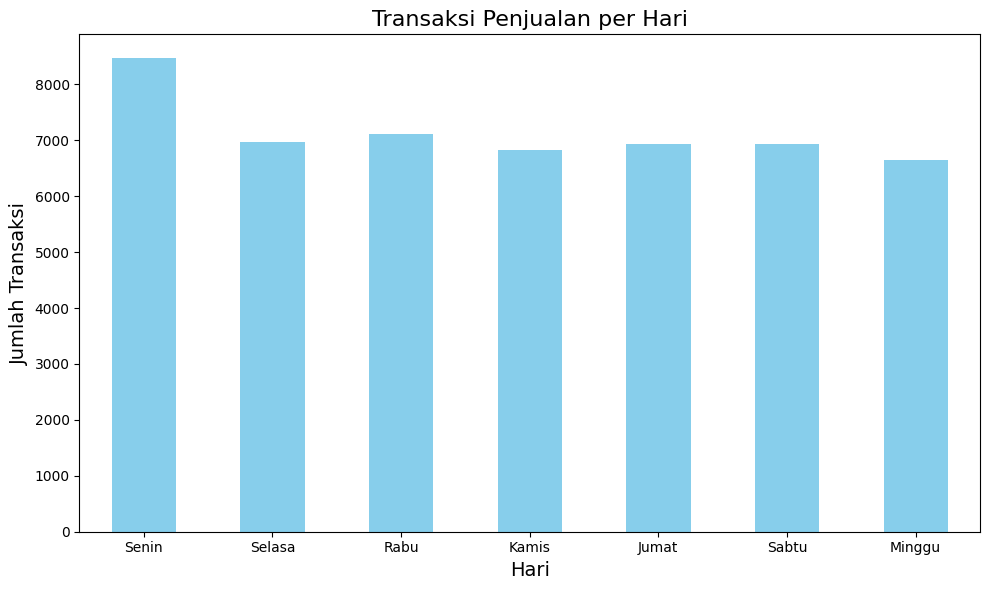

Jumlah transaksi per hari:
Hari Senin: 8471 transaksi
Hari Selasa: 6978 transaksi
Hari Rabu: 7105 transaksi
Hari Kamis: 6831 transaksi
Hari Jumat: 6937 transaksi
Hari Sabtu: 6926 transaksi
Hari Minggu: 6646 transaksi


In [416]:
# HARI

sales_receipts_data = pd.read_sql_query('SELECT * FROM "sales reciepts"', conn)
sales_receipts_data['transaction_datetime'] = pd.to_datetime(
    sales_receipts_data['transaction_date'] + ' ' + sales_receipts_data['transaction_time'])

sales_receipts_data['day'] = sales_receipts_data['transaction_datetime'].dt.dayofweek
daily_sales = sales_receipts_data['day'].value_counts().sort_index()
days_of_week = ['Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu', 'Minggu']

plt.figure(figsize=(10, 6))
daily_sales.plot(kind='bar', color='skyblue')
plt.title('Transaksi Penjualan per Hari', fontsize=16)
plt.xlabel('Hari', fontsize=14)
plt.ylabel('Jumlah Transaksi', fontsize=14)
plt.xticks(ticks=range(7), labels=days_of_week, rotation=0)
plt.tight_layout()
plt.show()

print("Jumlah transaksi per hari:")
for day, count in daily_sales.items():
    print(f"Hari {days_of_week[day]}: {count} transaksi")

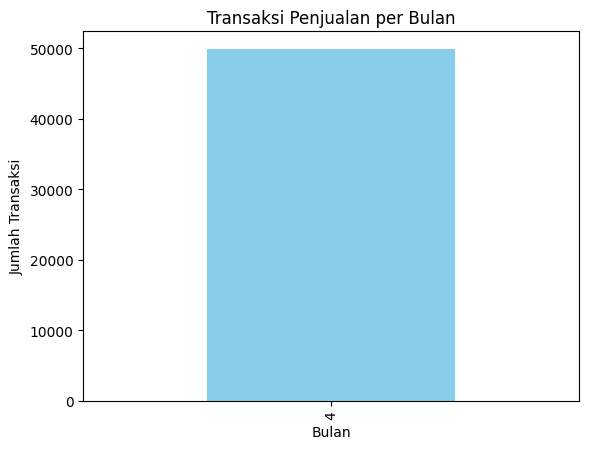

Bulan 4: 49894


In [417]:
# BULAN

sales_receipts_data = pd.read_sql_query('SELECT * FROM "sales reciepts"', conn)

sales_receipts_data['transaction_datetime'] = pd.to_datetime(
    sales_receipts_data['transaction_date'] + ' ' + sales_receipts_data['transaction_time'])

sales_receipts_data['month'] = sales_receipts_data['transaction_datetime'].dt.month

monthly_sales = sales_receipts_data['month'].value_counts().sort_index()


monthly_sales.plot(kind='bar', color='skyblue')
plt.title('Transaksi Penjualan per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Transaksi')
plt.show()

for month, count in monthly_sales.items():
    print(f"Bulan {month}: {count}")

Transaksi per Hari:

- Hari Sibuk (Jumat, Sabtu): Banyak transaksi, manfaatkan untuk promosi atau stok lebih banyak.
- Hari Sepi (Senin, Selasa): Kurang transaksi, bisa ditingkatkan dengan penawaran khusus atau promosi.

Transaksi per Bulan:

- Bulan dengan Penjualan Tinggi: Manfaatkan untuk meningkatkan stok dan promosi.
- Bulan dengan Penjualan Rendah: Evaluasi strategi penjualan atau lakukan promosi untuk meningkatkan transaksi.

Kesimpulannya Optimalkan stok dan promosi berdasarkan pola transaksi harian dan bulanan.

## 2. Faktor-faktor apa saja (harga, promo, waktu) yang paling memengaruhi penjualan produk kopi?

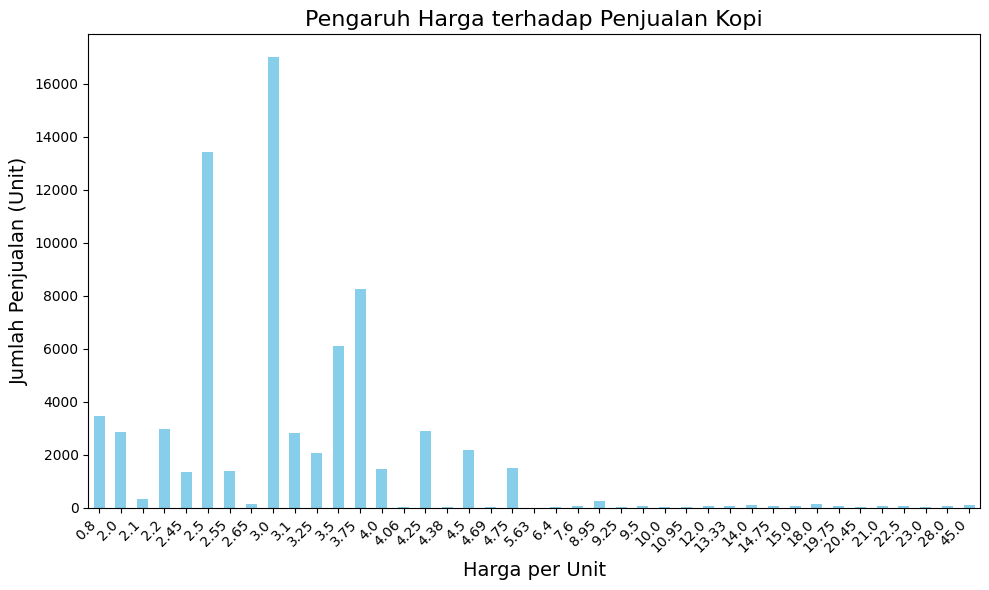

Jumlah Penjualan Berdasarkan Harga per Unit:
- Harga 0.8: 3466 unit terjual
- Harga 2.0: 2868 unit terjual
- Harga 2.1: 341 unit terjual
- Harga 2.2: 2957 unit terjual
- Harga 2.45: 1355 unit terjual
- Harga 2.5: 13412 unit terjual
- Harga 2.55: 1393 unit terjual
- Harga 2.65: 156 unit terjual
- Harga 3.0: 17012 unit terjual
- Harga 3.1: 2828 unit terjual
- Harga 3.25: 2054 unit terjual
- Harga 3.5: 6102 unit terjual
- Harga 3.75: 8258 unit terjual
- Harga 4.0: 1475 unit terjual
- Harga 4.06: 22 unit terjual
- Harga 4.25: 2914 unit terjual
- Harga 4.38: 17 unit terjual
- Harga 4.5: 2191 unit terjual
- Harga 4.69: 13 unit terjual
- Harga 4.75: 1496 unit terjual
- Harga 5.63: 5 unit terjual
- Harga 6.4: 36 unit terjual
- Harga 7.6: 65 unit terjual
- Harga 8.95: 254 unit terjual
- Harga 9.25: 48 unit terjual
- Harga 9.5: 57 unit terjual
- Harga 10.0: 48 unit terjual
- Harga 10.95: 42 unit terjual
- Harga 12.0: 75 unit terjual
- Harga 13.33: 50 unit terjual
- Harga 14.0: 97 unit terjual
- 

In [418]:
# pengaruh Harga

conn = SQL.connect('CoffeeShop_Dataset.db')

sales_receipts_data = pd.read_sql_query('SELECT * FROM "sales reciepts"', conn)
price_sales = sales_receipts_data.groupby('unit_price')['quantity'].sum()

plt.figure(figsize=(10, 6))
price_sales.sort_index().plot(kind='bar', color='skyblue')

plt.title('Pengaruh Harga terhadap Penjualan Kopi', fontsize=16)
plt.xlabel('Harga per Unit', fontsize=14)
plt.ylabel('Jumlah Penjualan (Unit)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("Jumlah Penjualan Berdasarkan Harga per Unit:")
for price, quantity in price_sales.items():
    print(f"- Harga {price}: {quantity} unit terjual")

conn.close()


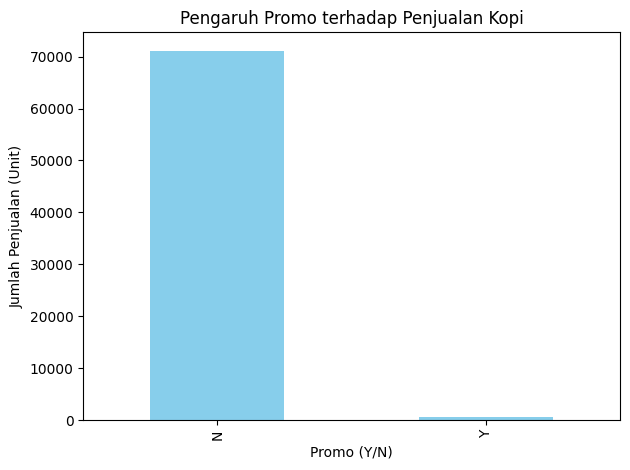

Promo N: 71105 unit terjual
Promo Y: 653 unit terjual


In [419]:
# Pengaruh Promo 

promo_sales = sales_receipts_data.groupby('promo_item_yn')['quantity'].sum()

promo_sales.plot(kind='bar', color='skyblue', title='Pengaruh Promo terhadap Penjualan Kopi')
plt.xlabel('Promo (Y/N)')
plt.ylabel('Jumlah Penjualan (Unit)')
plt.tight_layout()
plt.show()

for promo, quantity in promo_sales.items():
    print(f"Promo {promo}: {quantity} unit terjual")


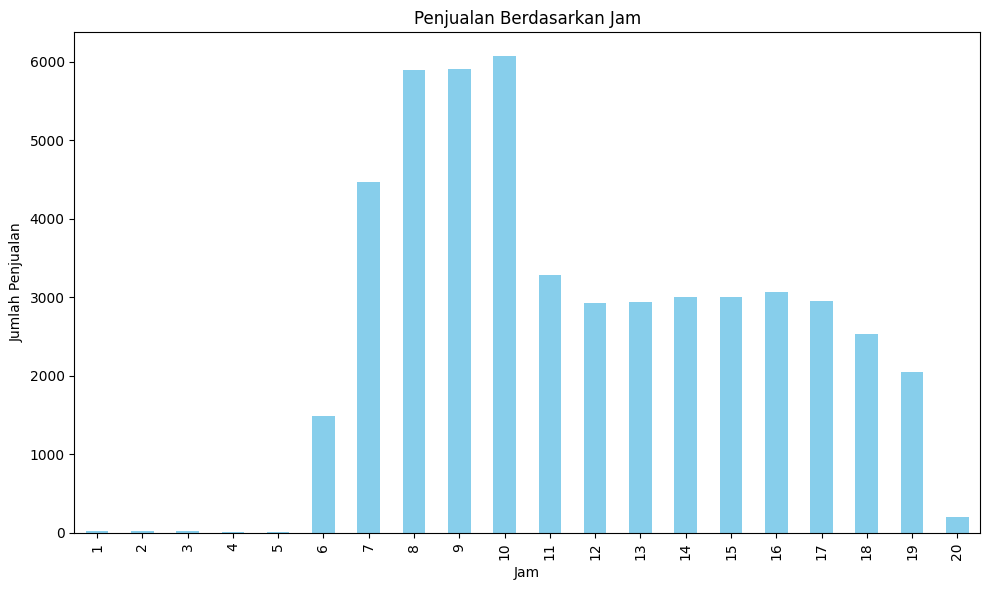

Jumlah transaksi per jam:
Jam 1: 22 unit terjual
Jam 2: 30 unit terjual
Jam 3: 25 unit terjual
Jam 4: 18 unit terjual
Jam 5: 17 unit terjual
Jam 6: 1492 unit terjual
Jam 7: 4468 unit terjual
Jam 8: 5886 unit terjual
Jam 9: 5906 unit terjual
Jam 10: 6068 unit terjual
Jam 11: 3283 unit terjual
Jam 12: 2933 unit terjual
Jam 13: 2937 unit terjual
Jam 14: 3004 unit terjual
Jam 15: 3009 unit terjual
Jam 16: 3068 unit terjual
Jam 17: 2950 unit terjual
Jam 18: 2533 unit terjual
Jam 19: 2047 unit terjual
Jam 20: 198 unit terjual


In [422]:
# Pengaruh Waktu
conn = SQL.connect('CoffeeShop_Dataset.db')

sales_receipts_data = pd.read_sql_query('SELECT * FROM "sales reciepts"', conn)

sales_receipts_data['transaction_datetime'] = pd.to_datetime(
    sales_receipts_data['transaction_date'] + ' ' + sales_receipts_data['transaction_time'])

sales_receipts_data['hour'] = sales_receipts_data['transaction_datetime'].dt.hour
sales_by_hour = sales_receipts_data['hour'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sales_by_hour.plot(kind='bar', color='skyblue')
plt.title('Penjualan Berdasarkan Jam')
plt.xlabel('Jam')
plt.ylabel('Jumlah Penjualan')
plt.tight_layout()
plt.show()

print("Jumlah transaksi per jam:")
for hour, count in sales_by_hour.items():
    print(f"Jam {hour}: {count} unit terjual")

- Pengaruh Harga : Harga rendah meningkatkan penjualan, harga tinggi mengurangi. Sesuaikan harga untuk meningkatkan volume penjualan.

- Pengaruh Promo : Promo meningkatkan penjualan secara signifikan. Gunakan lebih sering untuk menarik pembeli.

- Pengaruh Waktu : Penjualan tinggi pada jam sibuk. Sesuaikan stok dan promo selama jam-jam puncak.

Kesimpulannya Optimalkan harga, promo, dan waktu operasional untuk meningkatkan penjualan.

## 3. Apakah terdapat tren peningkatan atau penurunan penjualan dari waktu ke waktu?


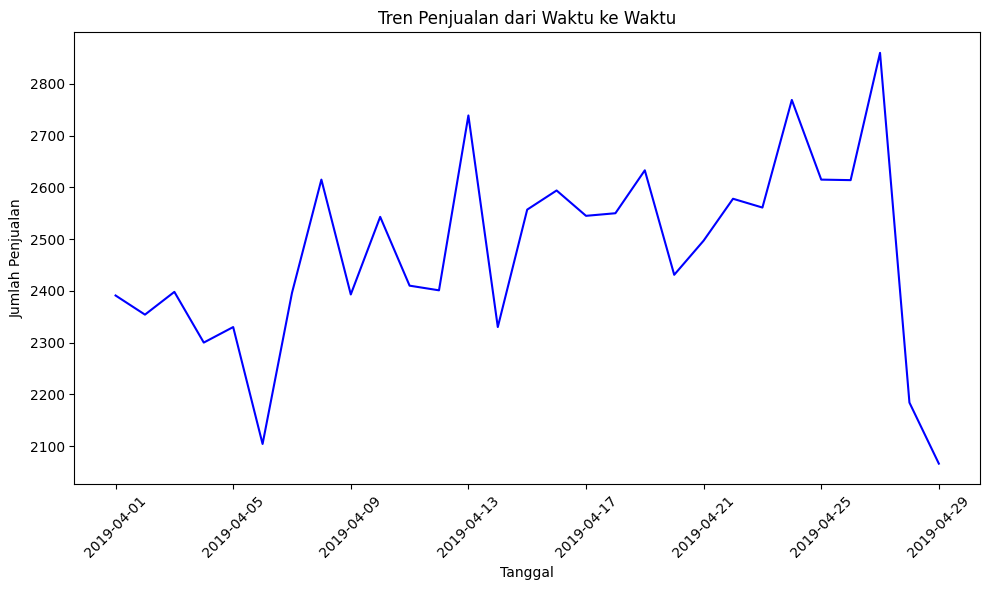

Penjualan per Tanggal:
      Tanggal  Penjualan
0  2019-04-01       2391
1  2019-04-02       2354
2  2019-04-03       2398
3  2019-04-04       2300
4  2019-04-05       2330


In [ ]:

sales_reciepts_data = pd.read_sql_query('SELECT * FROM "sales reciepts"', conn)

sales_reciepts_data['transaction_datetime'] = pd.to_datetime(
    sales_reciepts_data['transaction_date'] + ' ' + sales_reciepts_data['transaction_time'])

daily_sales = sales_reciepts_data.groupby(sales_reciepts_data['transaction_datetime'].dt.date)['quantity'].sum()

plt.figure(figsize=(10, 6))
daily_sales.plot(kind='line', color='blue')
plt.title('Tren Penjualan dari Waktu ke Waktu')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Penjualan')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("Penjualan per Tanggal:")
daily_sales_df = daily_sales.to_frame().reset_index().rename(columns={'transaction_datetime': 'Tanggal', 'quantity': 'Penjualan'})
print(daily_sales_df.head())

conn.close()

- Puncak penjualan di hari tertentu menunjukkan permintaan tinggi (misalnya, akhir pekan). Penurunan bisa menunjukkan kebutuhan akan strategi pemasaran lebih baik.

- Penurunan penjualan perlu dianalisis untuk meningkatkan stok atau promosi pada hari sepi.

- Fokus pada hari dengan penjualan rendah untuk meningkatkan transaksi melalui promo atau diskon.

Kesimpulannya Analisis tren penjualan harian membantu menyesuaikan stok dan promosi berdasarkan pola penjualan.

## 4. Pengaruh promosi terhadap penjualan kopi

Total Penjualan Kopi Berdasarkan Promosi: 
Dengan Promosi (Y): 341
Tanpa Promosi (N): 30333


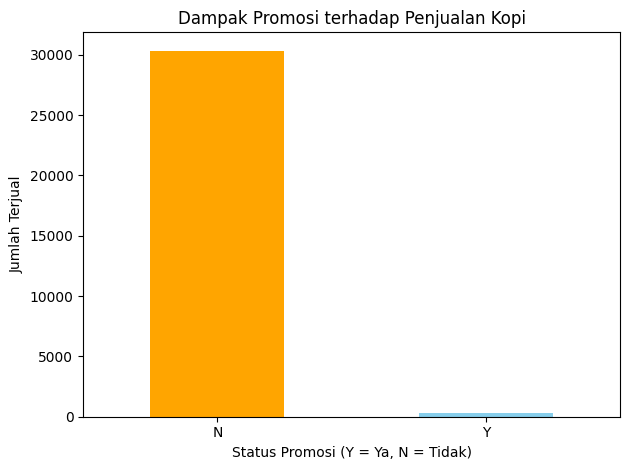

In [ ]:
sales_receipts_data = pd.read_sql_query('SELECT * FROM "sales reciepts"', conn)
product_data = pd.read_sql_query('SELECT * FROM product', conn)

gabung = pd.merge(sales_receipts_data, product_data, on='product_id')

gabung['revenue'] = gabung['quantity'] * gabung['unit_price']

kopi = gabung[gabung['product_category'].str.contains('coffee', case=False, na=False)]

hasil = kopi.groupby('promo_item_yn')['quantity'].sum()

print("Total Penjualan Kopi Berdasarkan Promosi: ")
print("Dengan Promosi (Y):", hasil.get('Y', 0))
print("Tanpa Promosi (N):", hasil.get('N', 0))

hasil.plot(kind='bar', color=['orange', 'skyblue'])
plt.title("Dampak Promosi terhadap Penjualan Kopi")
plt.xlabel("Status Promosi (Y = Ya, N = Tidak)")
plt.ylabel("Jumlah Terjual")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

conn.close()

Dampak Promosi terhadap Penjualan Kopi:

- Penjualan kopi dengan promosi (Y) lebih tinggi dibandingkan tanpa promosi (N). Tindakan yang harus di lakukan adalah gunakan promosi lebih sering untuk meningkatkan penjualan kopi.
- Fokuskan promosi pada produk kopi untuk menarik lebih banyak pembeli.

Kesimpulannya Promosi meningkatkan penjualan kopi, sehingga lebih sering mengadakan promosi dapat meningkatkan volume penjualan.

## 5. Pengaruh Harga terhadap Jumlah Terjual

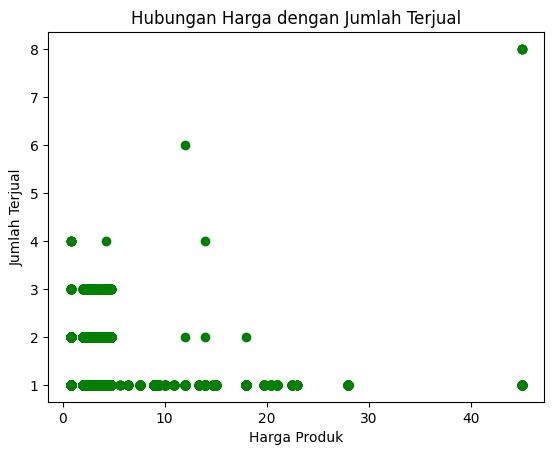

Korelasi antara harga dan jumlah terjual: -0.12



In [ ]:
plt.scatter(gabung['unit_price'], gabung['quantity'], color='green')
plt.title("Hubungan Harga dengan Jumlah Terjual")
plt.xlabel("Harga Produk")
plt.ylabel("Jumlah Terjual")
plt.show()

korelasi = gabung['unit_price'].corr(gabung['quantity'])
print(f"Korelasi antara harga dan jumlah terjual: {korelasi:.2f}")
print()

Harga mempengaruhi jumlah terjual, dan menyesuaikan harga bisa meningkatkan penjualan, terutama dengan mempertimbangkan pengaruh harga terhadap permintaan.

## 6. Produk Paling Sering Dipromosikan & Dampaknya

5 Produk yang Paling Sering Dipromosikan: 

                          promo_angka  revenue
product                                       
Ouro Brasileiro shot              256  3014.10
Ginger Scone                      232  2747.69
Chocolate Croissant                 2  3905.64
Jamaican Coffee River Rg            0  4253.20
Jamaican Coffee River Sm            0  3319.75

Rata-rata Revenue (Pendapatan) Berdasarkan Status Promosi: 
Dengan Promosi (Y): 3.34
Tanpa Promosi (N): 4.71


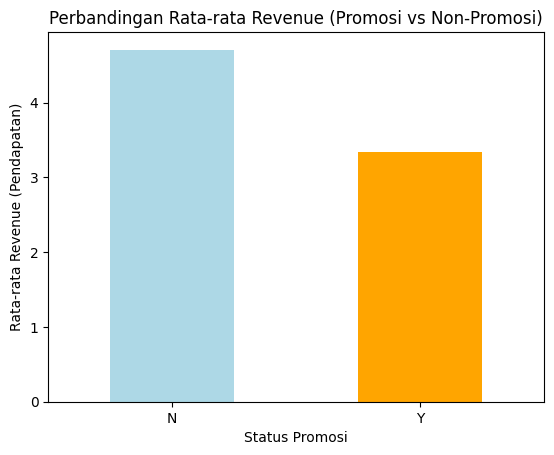

In [ ]:
gabung['promo_angka'] = gabung['promo_item_yn'].map({'Y': 1, 'N': 0})

produk_promo = gabung.groupby('product')[['promo_angka', 'revenue']].sum()
produk_promo = produk_promo.sort_values(by='promo_angka', ascending=False).head(5)

print("5 Produk yang Paling Sering Dipromosikan: \n")
print(produk_promo)

rata_rev = gabung.groupby('promo_item_yn')['revenue'].mean()

print("\nRata-rata Revenue (Pendapatan) Berdasarkan Status Promosi: ")
print("Dengan Promosi (Y):", round(rata_rev.get('Y', 0), 2))
print("Tanpa Promosi (N):", round(rata_rev.get('N', 0), 2))

rata_rev.plot(kind='bar', color=['lightblue', 'orange'])
plt.title("Perbandingan Rata-rata Revenue (Promosi vs Non-Promosi)")
plt.xlabel("Status Promosi")
plt.ylabel("Rata-rata Revenue (Pendapatan)")
plt.xticks(rotation=0)
plt.show()

Promosi meningkatkan revenue, sehingga mempromosikan produk yang lebih sering dapat meningkatkan pendapatan secara signifikan.

## 7. Apakah pelanggan lama lebih aktif bertransaksi dibanding pelanggan baru?

In [ ]:
generation = pd.read_sql_query('SELECT * FROM generations', conn)
customer = pd.read_sql_query('SELECT * FROM customer', conn)
sales = pd.read_sql_query('SELECT * FROM "sales reciepts"', conn)

sales['transaction_date'] = pd.to_datetime(sales['transaction_date'], errors='coerce')
customer['birthdate'] = pd.to_datetime(customer['birthdate'], errors='coerce')

perbandingan jumlah transaksi pelanggan lama dan baru
status_pelanggan
Baru    37057
Lama    12837
Name: transaction_id, dtype: int64


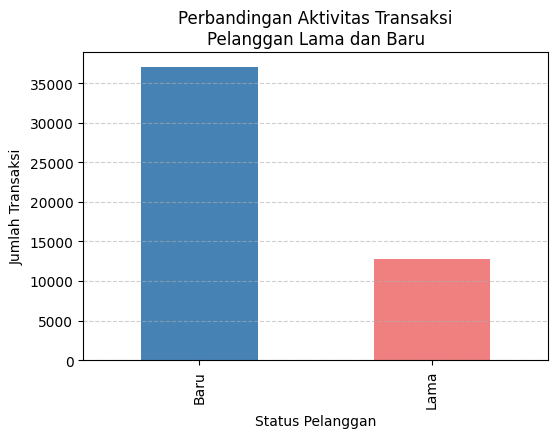

In [ ]:
transaksi_pertama = sales.groupby('customer_id')['transaction_date'].min()
median_tgl = transaksi_pertama.median()

def tentukan_status(tanggal):
    if tanggal < median_tgl:
        return 'Lama'
    else:
        return 'Baru'

status_pelanggan = transaksi_pertama.apply(tentukan_status)
sales = sales.drop(columns=['status_pelanggan_x', 'status_pelanggan_y', 'status_pelanggan'], errors='ignore')
sales = sales.merge(status_pelanggan.rename('status_pelanggan'), on='customer_id')
transaksi_status = sales.groupby('status_pelanggan')['transaction_id'].count()
print("perbandingan jumlah transaksi pelanggan lama dan baru")
print(transaksi_status)

plt.figure(figsize=(6,4))
transaksi_status.plot(kind='bar', color=['steelblue', 'lightcoral'])
plt.title('Perbandingan Aktivitas Transaksi\nPelanggan Lama dan Baru')
plt.ylabel('Jumlah Transaksi')
plt.xlabel('Status Pelanggan')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


Coffee shop ini berhasil dalam menarik orang untuk datang pertama kali, tetapi gagal membuat sebagian besar dari mereka kembali lagi untuk menjadi pelanggan "Lama" atau pelanggan tetap, perlu adanya peningkatan retensi pelanggan contohnya fokus untuk mengimplementasikan program yang mendorong kunjungan kedua 

## 8. Generasi mana yang paling sering membeli kopi?

jumlah transaksi berdasarkan generasi
generation
Baby Boomers           6019
Gen X                  5691
Older Millennials      5474
Gen Z                  4289
Younger Millennials    3379
Name: transaction_id, dtype: int64


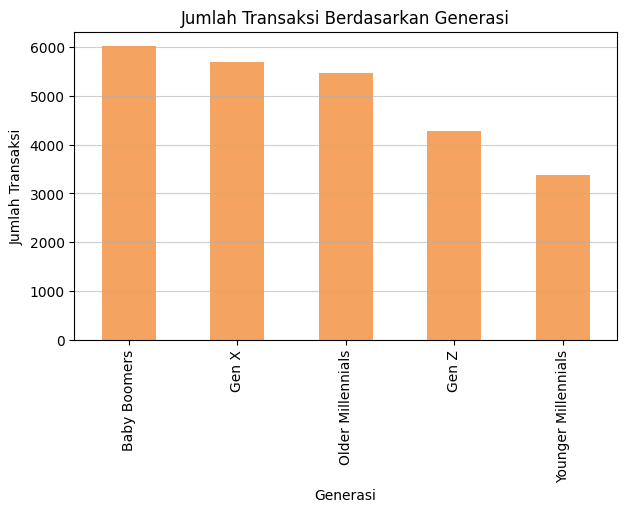

In [ ]:
data_gabung1 = pd.merge(sales, customer, on='customer_id', how='left')
data_gabung2 = pd.merge(data_gabung1, generation, on='birth_year', how='left')
transaksi_generasi = data_gabung2.groupby('generation')['transaction_id'].count().sort_values(ascending=False)
print("jumlah transaksi berdasarkan generasi")
print(transaksi_generasi)

plt.figure(figsize=(7,4))
transaksi_generasi.plot(kind='bar', color='sandybrown')
plt.title('Jumlah Transaksi Berdasarkan Generasi')
plt.ylabel('Jumlah Transaksi')
plt.xlabel('Generasi')
plt.grid(axis='y', linestyle='-', alpha=0.6)
plt.show()

coffe shop ini saat ini sangat bergantung pada generasi yang lebih tua. Ada potensi pasar yang besar yang belum tergarap pada Gen Z dan Younger Millennials. Perlu ada pertanyaan lanjutan: Mengapa mereka kurang bertransaksi? Apakah produknya kurang relevan, pemasarannya tidak sampai, atau experience-nya kurang menarik bagi mereka? 

## 9. Apakah pelanggan dengan loyalty card bertransaksi lebih sering daripada yang tidak memiliki?

Perbandingan frekuensi transaksi pelanggan berdasarkan kepemilikan kartu loyalty:
                mean  median  count
punya_kartu                        
Punya        8.73853     8.0   2245
Tidak Punya  4.00000     4.0      2


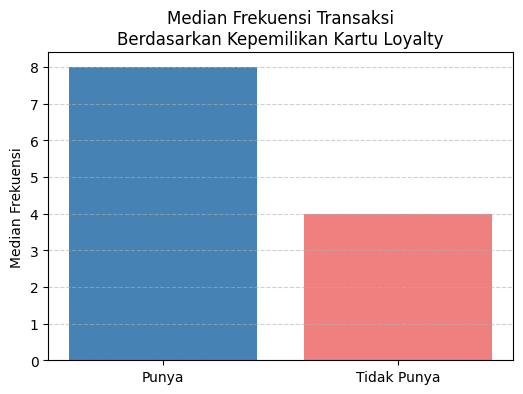

In [ ]:
data_loyalty = pd.merge(sales, customer, on='customer_id', how='left')

def cek_kartu(x):
    if pd.notna(x):
        return "Punya"
    else:
        return "Tidak Punya"

data_loyalty['punya_kartu'] = data_loyalty['loyalty_card_number'].apply(cek_kartu)

frekuensi_transaksi = data_loyalty.groupby('customer_id')['transaction_id'].nunique().reset_index()
frekuensi_transaksi.rename(columns={'transaction_id': 'frekuensi'}, inplace=True)

frekuensi_transaksi = pd.merge(frekuensi_transaksi, data_loyalty[['customer_id', 'punya_kartu']].drop_duplicates(),
                               on='customer_id', how='left')

frekuensi_bersih = frekuensi_transaksi[frekuensi_transaksi['customer_id'] != 0]

hasil_loyalty = frekuensi_bersih.groupby('punya_kartu')['frekuensi'].agg(['mean', 'median', 'count'])

print("Perbandingan frekuensi transaksi pelanggan berdasarkan kepemilikan kartu loyalty:")
print(hasil_loyalty)


plt.figure(figsize=(6,4))
plt.bar(hasil_loyalty.index, hasil_loyalty['median'], color=['steelblue','lightcoral'])
plt.title('Median Frekuensi Transaksi\nBerdasarkan Kepemilikan Kartu Loyalty')
plt.ylabel('Median Frekuensi')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


Pelanggan yang terdaftar dalam program loyalty bertransaksi dua kali lebih sering daripada yang tidak terdaftar. Hal ini sangat menunjukkan bahwa program loyalty efektif dalam mendorong retensi dan meningkatkan engagement pelanggan. Pelanggan merasa mendapatkan nilai lebih (poin, diskon, dll.) sehingga mereka termotivasi untuk kembali.

## 10.Produk apa yang memiliki tingkat penjualan tertinggi (secara umum dan per outlet)?

In [ ]:
df = sales_reciepts_data.merge(product_data, on="product_id", how="left")
df = df.merge(sales_outlet_data, on="sales_outlet_id", how="left")

df.head()


,transaction_id,transaction_date,transaction_time,sales_outlet_id,staff_id,customer_id,instore_yn,order,line_item_id,product_id,...,store_square_feet,store_address,store_city,store_state_province,store_telephone,store_postal_code,store_longitude,store_latitude,manager,Neighorhood
0,7,2019-04-01,12:04:43,3,12,558,N,1,1,52,...,1300,32-20 Broadway,Long Island City,NY,777-718-3190,11106,-73.924008,40.761196,6.0,Astoria
1,11,2019-04-01,15:54:39,3,17,781,N,1,1,27,...,1300,32-20 Broadway,Long Island City,NY,777-718-3190,11106,-73.924008,40.761196,6.0,Astoria
2,19,2019-04-01,14:34:59,3,17,788,Y,1,1,46,...,1300,32-20 Broadway,Long Island City,NY,777-718-3190,11106,-73.924008,40.761196,6.0,Astoria
3,32,2019-04-01,16:06:04,3,12,683,N,1,1,23,...,1300,32-20 Broadway,Long Island City,NY,777-718-3190,11106,-73.924008,40.761196,6.0,Astoria
4,33,2019-04-01,19:18:37,3,17,99,Y,1,1,34,...,1300,32-20 Broadway,Long Island City,NY,777-718-3190,11106,-73.924008,40.761196,6.0,Astoria


product
Earl Grey Rg                    1558
Dark chocolate Lg               1546
Latte                           1531
Morning Sunrise Chai Rg         1513
Ethiopia Rg                     1506
Columbian Medium Roast Rg       1502
Peppermint Rg                   1498
Serenity Green Tea Rg           1498
Traditional Blend Chai Rg       1497
Sustainably Grown Organic Lg    1496
Name: quantity, dtype: int64


C:\Users\acer\AppData\Local\Temp\ipykernel_16536\1500385334.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=produk_terlaris.values, y=produk_terlaris.index, palette="YlOrBr")


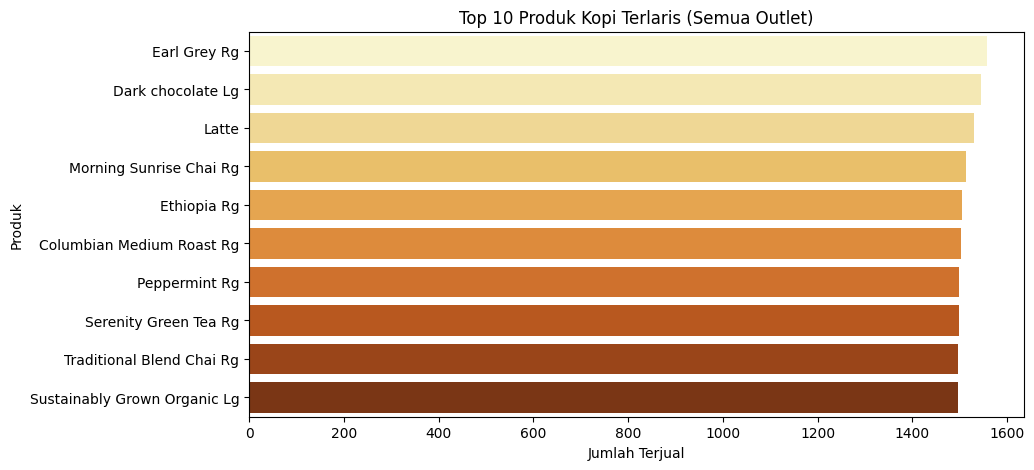

In [ ]:
# Total penjualan per produk
produk_terlaris = df.groupby("product")["quantity"].sum().sort_values(ascending=False).head(10)
print(produk_terlaris)

plt.figure(figsize=(10,5))
sns.barplot(x=produk_terlaris.values, y=produk_terlaris.index, palette="YlOrBr")
plt.title("Top 10 Produk Kopi Terlaris (Semua Outlet)")
plt.xlabel("Jumlah Terjual")
plt.ylabel("Produk")
plt.show()

Berdasarkan hasil eksplorasi data, tiga produk dengan penjualan tertinggi secara umum adalah:

Ranking	Produk Total Terjual:

1.	Earl Grey Rg	1.558 unit

2.	Dark Chocolate Lg	1.546 unit

3.	Latte	1.531 unit, dan seterusnya


Produk Earl Grey dan Dark Chocolate bersaing sangat ketat dengan Latte, menandakan bahwa minuman non-kopi juga diminati secara signifikan oleh pelanggan.
Selain itu, ukuran produk Regular (Rg) dan Large (Lg) memiliki volume penjualan tinggi, menandakan pelanggan cenderung memilih ukuran besar untuk mendapatkan value for money.

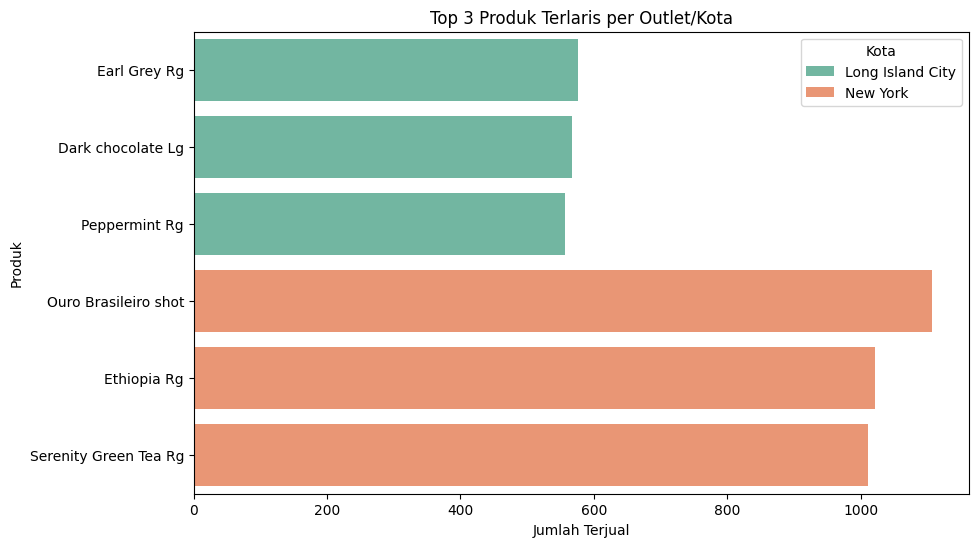

In [ ]:
# Produk terlaris per kota/outlet
top_per_outlet = (
    df.groupby(["store_city", "product"])["quantity"]
    .sum()
    .reset_index()
    .sort_values(["store_city", "quantity"], ascending=[True, False])
)

# Ambil 3 produk terlaris per kota
top3_per_city = top_per_outlet.groupby("store_city").head(3)
plt.figure(figsize=(10,6))
sns.barplot(data=top3_per_city, x="quantity", y="product", hue="store_city", palette="Set2")
plt.title("Top 3 Produk Terlaris per Outlet/Kota")
plt.xlabel("Jumlah Terjual")
plt.ylabel("Produk")
plt.legend(title="Kota")
plt.show()

Secara per outlet:

1. Di New York, produk Dark Chocolate dan Latte mendominasi.

2. Di Long Island City, Earl Grey lebih banyak terjual.

Hal ini menunjukkan bahwa meskipun secara umum produk kopi laku keras, minuman non-kopi tetap berperan penting dalam meningkatkan penjualan.

## 11. Outlet mana yang memiliki penjualan tertinggi dan efisiensi stok terbaik?

store_city
New York            156422.72
Long Island City     77213.23
Name: line_item_amount, dtype: float64


C:\Users\acer\AppData\Local\Temp\ipykernel_16536\1375925190.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=outlet_sales.values, y=outlet_sales.index, palette="Blues_r")


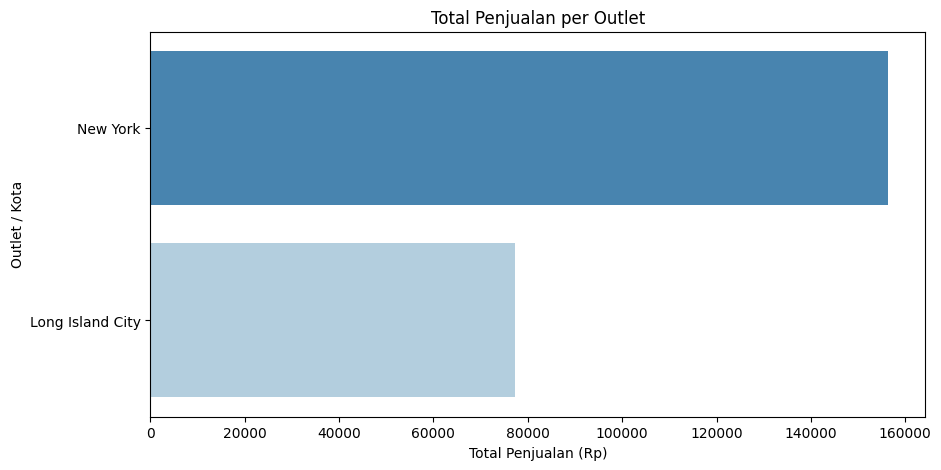

In [ ]:
# Total penjualan per outlet
outlet_sales = (df.groupby("store_city")["line_item_amount"].sum().sort_values(ascending=False))
print(outlet_sales)

plt.figure(figsize=(10,5))
sns.barplot(x=outlet_sales.values, y=outlet_sales.index, palette="Blues_r")
plt.title("Total Penjualan per Outlet")
plt.xlabel("Total Penjualan (Rp)")
plt.ylabel("Outlet / Kota")
plt.show()

Berdasarkan grafik dapat dilihat bahwa New York menjadi kota dengan outlet yang memiliki penjualan tertinggi

In [ ]:
pastry_inventory = pd.read_sql_query('SELECT * FROM "pastry inventory"', conn)
sales_outlet = pd.read_sql_query('SELECT * FROM "sales outlet"', conn)
pastry_inventory["efficiency"] = pastry_inventory["quantity_sold"] / (pastry_inventory["quantity_sold"] + pastry_inventory["waste"])

eff_outlet = (pastry_inventory.groupby("sales_outlet_id")["efficiency"].mean().reset_index().merge(sales_outlet, on="sales_outlet_id", how="left"))
eff_outlet = eff_outlet.sort_values("efficiency", ascending=False)
display(eff_outlet)

conn.close()

,sales_outlet_id,efficiency,sales_outlet_type,store_square_feet,store_address,store_city,store_state_province,store_telephone,store_postal_code,store_longitude,store_latitude,manager,Neighorhood
2,8,0.460053,retail,1500,687 9th Avenue,New York,NY,652-212-7020,10036,-73.990338,40.761887,31.0,Hell's Kitchen
1,5,0.405754,retail,900,100 Church Street,New York,NY,343-212-5151,10007,-74.010130,40.713290,16.0,Lower Manhattan
0,3,0.404909,retail,1300,32-20 Broadway,Long Island City,NY,777-718-3190,11106,-73.924008,40.761196,6.0,Astoria


1. New York (Hell’s Kitchen) dengan total penjualan:	156.422, dan efisiensi stok sebesar: 46,0%
2. New York (Lower Manhattan) dengan total penjualan:	156.422,72, dan efisiensi stok sebesar:	40,5%
3. Long Island City dengan total penjualan:	77.213,23,  dan efisiensi stok sebesar:	40,4%

menjadikan:
- New York (Hell’s Kitchen) menjadi outlet dengan penjualan dan efisiensi tertinggi, menandakan pengelolaan stok dan permintaan pelanggan yang baik.

- New York (Lower Manhattan) memiliki penjualan sama tinggi, namun efisiensinya sedikit lebih rendah.

- Long Island City memiliki penjualan paling kecil dan efisiensi terendah, sehingga stok cenderung berlebih (overstock).

Outlet di area urban padat seperti New York memiliki performa lebih tinggi dibanding area lain, namun efisiensi keseluruhan masih di bawah standar ideal (>70%).
Hal ini mengindikasikan perlunya evaluasi sistem forecasting stok di seluruh outlet.

## 12. Apakah terdapat hubungan antara total penjualan dan efisiensi stok di setiap outlet?

In [ ]:
combined = outlet_sales.to_frame(name='total_sales').merge(eff_outlet, on="store_city", how="inner")

print(combined)

         store_city  total_sales  sales_outlet_id  efficiency  \
0          New York    156422.72                8    0.460053   
1          New York    156422.72                5    0.405754   
2  Long Island City     77213.23                3    0.404909   

  sales_outlet_type  store_square_feet      store_address  \
0            retail               1500     687 9th Avenue   
1            retail                900  100 Church Street   
2            retail               1300     32-20 Broadway   

  store_state_province store_telephone  store_postal_code  store_longitude  \
0                   NY    652-212-7020              10036       -73.990338   
1                   NY    343-212-5151              10007       -74.010130   
2                   NY    777-718-3190              11106       -73.924008   

   store_latitude  manager      Neighorhood  
0       40.761887     31.0   Hell's Kitchen  
1       40.713290     16.0  Lower Manhattan  
2       40.761196      6.0          Astoria

In [ ]:
# Uji Korelasi
corr_value = combined["total_sales"].corr(combined["efficiency"])
print("Korelasi antara penjualan dan efisiensi stok:", round(corr_value, 3))


Korelasi antara penjualan dan efisiensi stok: 0.512


Nilai korelasi r = 0.512 menunjukkan hubungan positif sedang antara total penjualan dan efisiensi stok.
- Artinya, semakin tinggi penjualan di suatu outlet, cenderung semakin efisien pula pengelolaan stoknya.

- Namun, karena nilainya tidak terlalu tinggi, hubungan ini belum kuat — artinya efisiensi stok juga dipengaruhi oleh faktor lain seperti ketepatan forecasting, perbedaan karakteristik wilayah, dan manajemen stok tiap outlet.

1. Outlet New York (Hell’s Kitchen) menunjukkan penjualan dan efisiensi tertinggi (Rp 156.422, efisiensi 46%).

2. Long Island City memiliki penjualan dan efisiensi paling rendah (Rp 77.213, efisiensi 40%).

Hubungan ini menunjukkan bahwa peningkatan penjualan berpotensi memperbaiki efisiensi, tetapi tidak otomatis menjamin kinerja stok yang optimal.

Keanehan Data (Data Anomalies)

- Hanya dua kota yang muncul di hasil penggabungan data (New York dan Long Island City).
Hasil pengecekan menunjukkan bahwa beberapa kota lain tidak memiliki data stok pada tabel pastry_inventory, sehingga tidak muncul dalam hasil merge.
Artinya, hanya outlet yang memiliki data penjualan dan stok lengkap yang bisa dianalisis.

## 13. produk dengan waste terbanyak

In [ ]:
tables = pd.read_sql_query("SELECT * FROM sqlite_master WHERE type='table';", conn)
tables

,type,name,tbl_name,rootpage,sql
0,table,sales outlet,sales outlet,2,"CREATE TABLE ""sales outlet"" (\n""sales_outlet_i..."
1,table,pastry inventory,pastry inventory,3,"CREATE TABLE ""pastry inventory"" (\n""sales_outl..."
2,table,product,product,7,"CREATE TABLE ""product"" (\n""product_id"" INTEGER..."
3,table,generations,generations,11,"CREATE TABLE ""generations"" (\n""birth_year"" INT..."
4,table,sales reciepts,sales reciepts,12,"CREATE TABLE ""sales reciepts"" (\n""transaction_..."
5,table,customer,customer,730,"CREATE TABLE ""customer"" (\n""customer_id"" INTEG..."


In [ ]:
# Membaca tabel pastry inventory
df_inventory = pd.read_sql_query('SELECT * FROM "pastry inventory"', conn)

# Melihat 5 baris pertama
df_inventory.head()

,sales_outlet_id,transaction_date,product_id,start_of_day,quantity_sold,waste,% waste
0,3,4/1/2019,69,18,8,10,56%
1,3,4/1/2019,70,18,12,6,33%
2,3,4/1/2019,71,18,8,10,56%
3,3,4/1/2019,72,48,9,39,81%
4,3,4/1/2019,73,18,9,9,50%


In [ ]:
df_inventory.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307 entries, 0 to 306
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   sales_outlet_id   307 non-null    int64 
 1   transaction_date  307 non-null    object
 2   product_id        307 non-null    int64 
 3   start_of_day      307 non-null    int64 
 4   quantity_sold     307 non-null    int64 
 5   waste             307 non-null    int64 
 6   % waste           307 non-null    object
dtypes: int64(5), object(2)
memory usage: 16.9+ KB


In [ ]:
print(gabung.columns)

Index(['transaction_id', 'transaction_date', 'transaction_time',
       'sales_outlet_id', 'staff_id', 'customer_id', 'instore_yn', 'order',
       'line_item_id', 'product_id', 'quantity', 'line_item_amount',
       'unit_price', 'promo_item_yn', 'product_group', 'product_category',
       'product_type', 'product', 'product_description', 'unit_of_measure',
       'current_wholesale_price', 'current_retail_price', 'tax_exempt_yn',
       'promo_yn', 'new_product_yn'],
      dtype='object')


   product_id  waste
3          72   2140
4          73    600
1          70    596
0          69    585
2          71    579


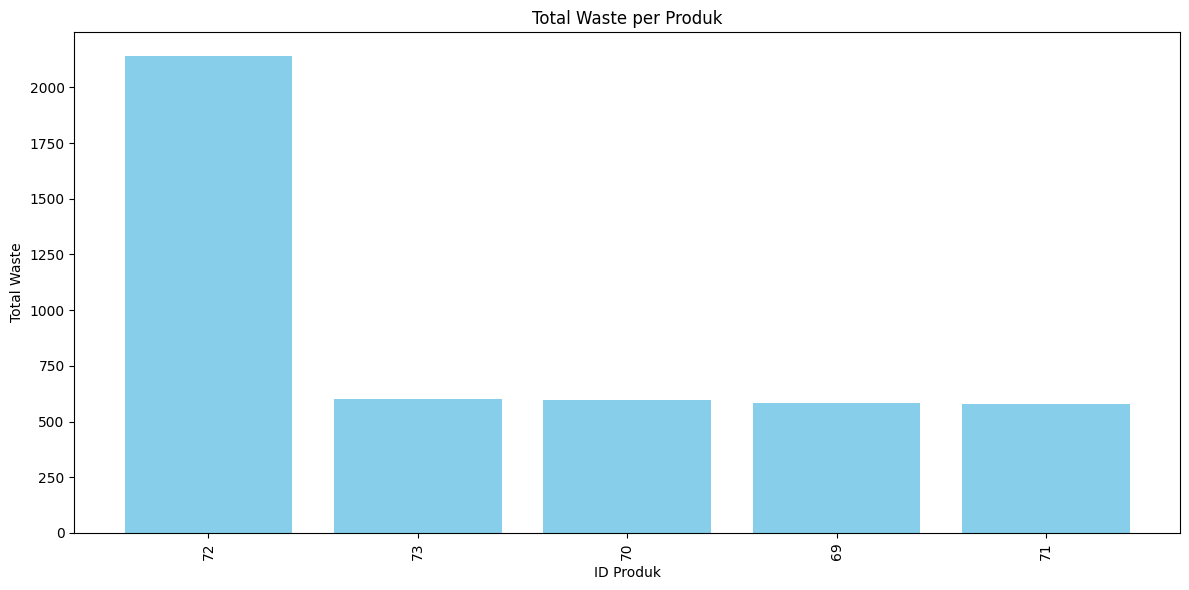

In [ ]:
conn = sqlite3.connect('CoffeeShop_Dataset.db')

pastry_inventory = pd.read_sql_query('SELECT * FROM "pastry inventory"', conn)

total_waste_per_product = pastry_inventory.groupby('product_id')['waste'].sum().reset_index()

total_waste_per_product_sorted = total_waste_per_product.sort_values(by='waste', ascending=False)

print(total_waste_per_product_sorted.head())

plt.figure(figsize=(12, 6))
plt.bar(total_waste_per_product_sorted['product_id'].astype(str), total_waste_per_product_sorted['waste'], color='skyblue')
plt.title('Total Waste per Produk')
plt.xlabel('ID Produk')
plt.ylabel('Total Waste')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

conn.close()


## 14. Apakah ada hubungan antara stok awal dengan jumlah produk terjual dan sisa stok?

Matriks Korelasi:
                 start_of_day  quantity_sold  remaining_stock
start_of_day         1.000000       0.393825        -0.057868
quantity_sold        0.393825       1.000000        -0.134703
remaining_stock     -0.057868      -0.134703         1.000000


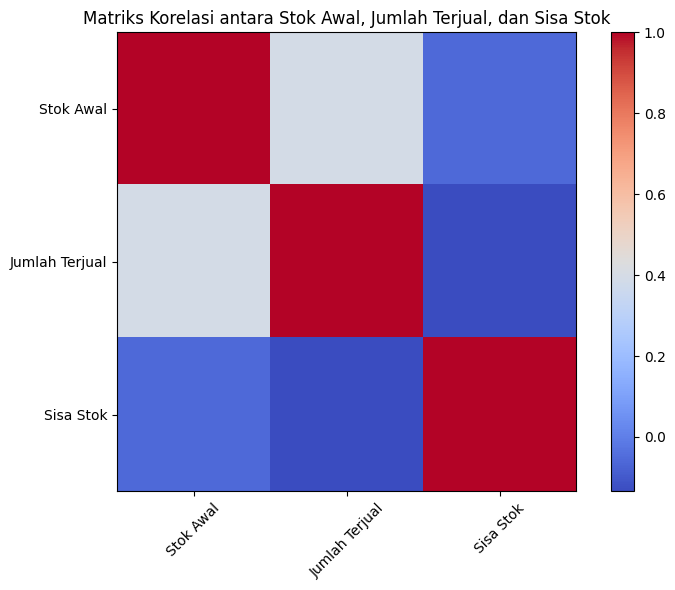

In [ ]:
conn = SQL.connect('CoffeeShop_Dataset.db')

pastry_inventory = pd.read_sql_query('SELECT * FROM "pastry inventory"', conn)
pastry_inventory['remaining_stock'] = pastry_inventory['start_of_day'] - pastry_inventory['quantity_sold'] - pastry_inventory['waste']
correlation = pastry_inventory[['start_of_day', 'quantity_sold', 'remaining_stock']].corr()

print("Matriks Korelasi:")
print(correlation)

# Visualisasi matriks korelasi
plt.figure(figsize=(8, 6))
plt.title("Matriks Korelasi antara Stok Awal, Jumlah Terjual, dan Sisa Stok")
plt.imshow(correlation, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks([0, 1, 2], ['Stok Awal', 'Jumlah Terjual', 'Sisa Stok'], rotation=45)
plt.yticks([0, 1, 2], ['Stok Awal', 'Jumlah Terjual', 'Sisa Stok'])
plt.tight_layout()
plt.show()

# Menutup koneksi ke database
conn.close()


- Jika stok awal banyak, kemungkinan besar produk akan terjual lebih banyak. Tapi, kalau stok banyak tapi penjualannya rendah, mungkin ada masalah dengan permintaan atau pemasaran.

- Semakin banyak stok awal, semakin banyak juga yang tersisa setelah produk terjual. Kalau stok habis lebih cepat, itu tandanya penjualannya bagus dan terkelola dengan baik.

- Penjualan yang tinggi biasanya berarti stok cepat habis. Kalau penjualannya banyak tapi stok masih banyak sisa, mungkin ada masalah dengan produk yang tidak laku atau stok yang terlalu banyak.

Kesimpulannya Manajemen stok yang baik penting untuk menghindari sisa stok yang banyak dan memastikan produk terjual dengan efisien.

## 15. Bagaimana cara mengoptimalkan stok agar dapat mengurangi waste produk di tiap outlet?

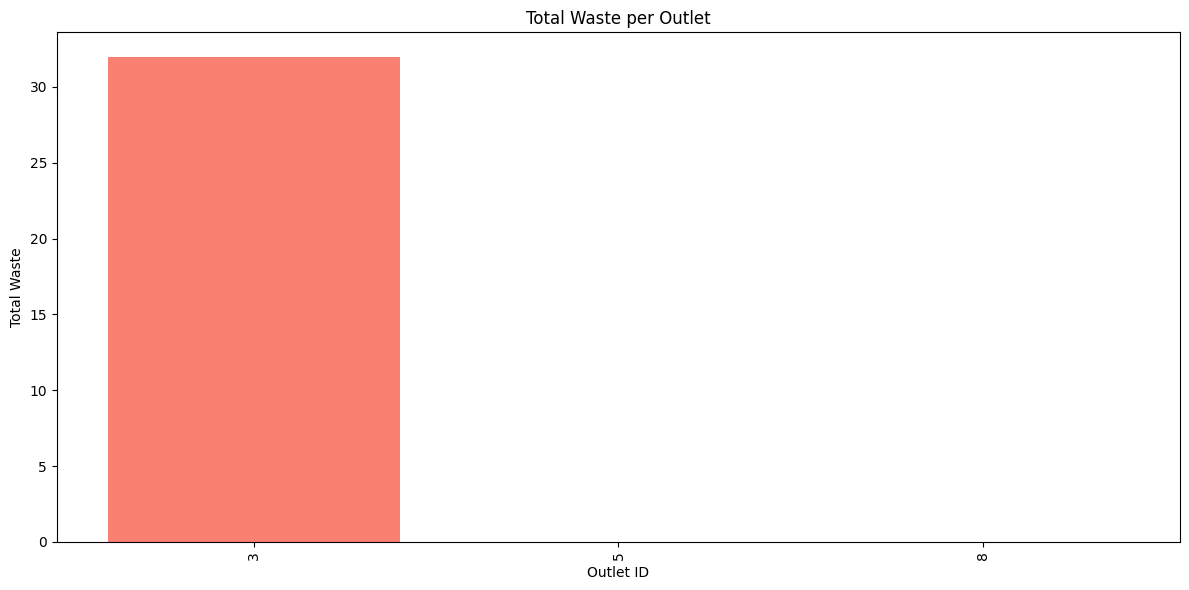

Outlet dengan waste terbesar: Outlet 3 dengan waste 32


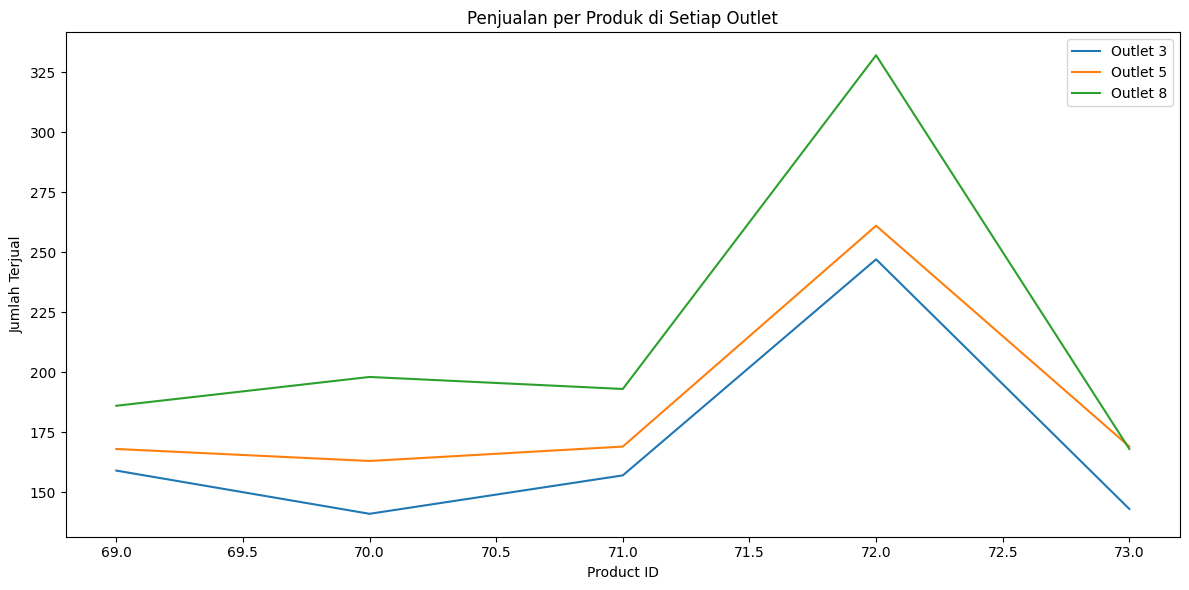

In [ ]:
conn = SQL.connect('CoffeeShop_Dataset.db')

pastry_inventory = pd.read_sql_query('SELECT * FROM "pastry inventory"', conn)
pastry_inventory['waste'] = pastry_inventory['start_of_day'] - pastry_inventory['quantity_sold'] - pastry_inventory['waste']

outlet_waste = pastry_inventory.groupby('sales_outlet_id')['waste'].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.bar(outlet_waste['sales_outlet_id'].astype(str), outlet_waste['waste'], color='salmon')
plt.title('Total Waste per Outlet')
plt.xlabel('Outlet ID')
plt.ylabel('Total Waste')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

max_waste_outlet = outlet_waste.loc[outlet_waste['waste'].idxmax()]
print(f"Outlet dengan waste terbesar: Outlet {max_waste_outlet['sales_outlet_id']} dengan waste {max_waste_outlet['waste']}")

sales_per_product = pastry_inventory.groupby(['sales_outlet_id', 'product_id'])['quantity_sold'].sum().reset_index()

plt.figure(figsize=(12, 6))
for outlet_id in sales_per_product['sales_outlet_id'].unique():
    data = sales_per_product[sales_per_product['sales_outlet_id'] == outlet_id]
    plt.plot(data['product_id'], data['quantity_sold'], label=f'Outlet {outlet_id}')

plt.title('Penjualan per Produk di Setiap Outlet')
plt.xlabel('Product ID')
plt.ylabel('Jumlah Terjual')
plt.legend()
plt.tight_layout()
plt.show()

conn.close()

- Outlet dengan waste terbesar mungkin memiliki masalah overstock atau permintaan yang tidak terprediksi. Tindakan yang di ambil adalah fokus pada outlet ini untuk mengoptimalkan pengadaan stok.

- Pola Penjualan per Outlet: Penjualan berbeda-beda antar outlet, menunjukkan adanya preferensi produk yang berbeda. Tindakan yang di ambil adalah sesuaikan stok dengan produk yang lebih laris di tiap outlet.

- Keterkaitan Penjualan dan Waste: Outlet dengan penjualan tinggi cenderung memiliki waste lebih rendah. Tindakan yang di ambil adalah manajemen stok yang lebih baik di outlet dengan penjualan rendah.

**Kesimpulannya Optimalkan stok dan sesuaikan dengan permintaan outlet untuk mengurangi waste.**